In [1]:
import pandas as pd
import numpy as np
import gensim
import csv
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import multiprocessing
from adjustText import adjust_text
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import os
import random
import re
import string

import nltk
import numpy as np
import pandas as pd

from gensim.models import Word2Vec

from nltk import word_tokenize
from nltk.corpus import stopwords

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

nltk.download("stopwords")

SEED = 42
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data_f = pd.read_csv(r"C:\Users\manas\Documents\Master Thesis\code\Manasa2022\skill_id\processed_data\cleaned_data.csv")
df = data_f.head(20000)

In [4]:
df.head(3)

,skill,skill_id
0,emdr,12473585.0
1,io,955308.0
2,product development,972534.0


In [43]:
df1 = df
df1.index = df1['skill']
df1 = df1.drop(['skill'], axis = 1)
skill = "coaching"
id = df1.loc[skill]['skill_id'].unique()
id

array([977782.])

In [5]:
sent = [row.split(',') for row in df['skill']]

sent[:10]

[['emdr'],
 ['io'],
 ['product development'],
 ['business development'],
 ['automatisering'],
 ['marketing communications'],
 ['mobile devices'],
 ['research'],
 ['communication'],
 ['new media']]

In [6]:
model = Word2Vec(sentences=sent, min_count=2, size=100, workers=5, window=5, sg=1)

C:\Users\manas\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(


In [7]:
model.wv.most_similar('microsoft office', topn=5)

[('linkedin', 0.34070664644241333),
 ('google adwords', 0.30727487802505493),
 ('performance management', 0.294380784034729),
 ('auditing', 0.2915169298648834),
 ('horticulture', 0.28526321053504944)]

C:\Users\manas\AppData\Local\Temp/ipykernel_17504/2480770503.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  l = linkage(model.wv.syn0, method='complete', metric='seuclidean')


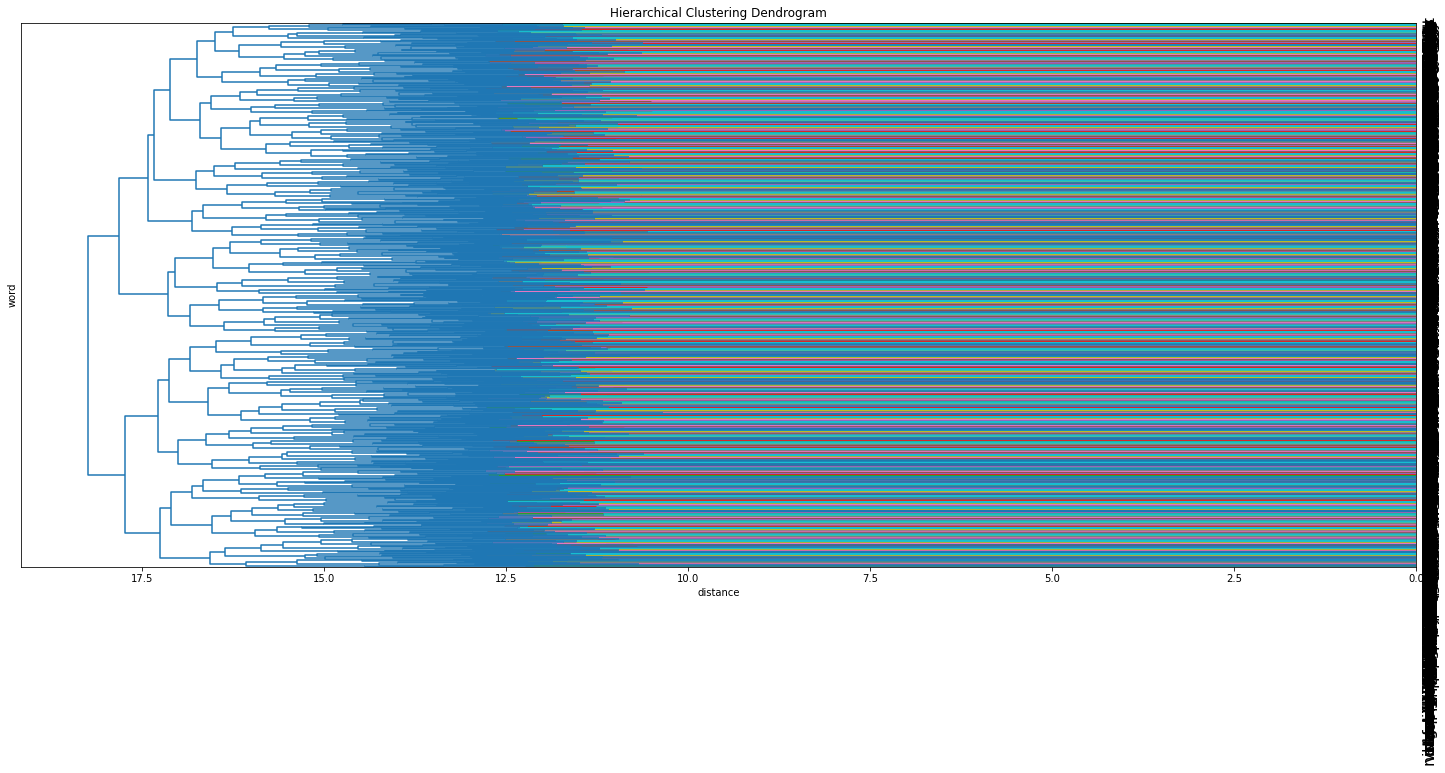

In [8]:

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

l = linkage(model.wv.syn0, method='complete', metric='seuclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('word')
plt.xlabel('distance')

dendrogram(
    l,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=16.,  # font size for the x axis labels
    orientation='left',
    leaf_label_func=lambda v: str(model.wv.index2word[v])
)
plt.show()

In [11]:
# fit a 2D PCA model to the vectors
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
import re

vectors = model[model.wv.vocab]
words = list(model.wv.vocab)
pca = PCA(n_components=2)
PCA_result = pca.fit_transform(vectors)

C:\Users\manas\AppData\Local\Temp/ipykernel_17504/2834876378.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vectors = model[model.wv.vocab]


In [13]:
#prepare a dataframe
words = pd.DataFrame(words)
PCA_result = pd.DataFrame(PCA_result)
PCA_result['x_values'] =PCA_result.iloc[0:, 0]
PCA_result['y_values'] =PCA_result.iloc[0:, 1]
PCA_final = pd.merge(words, PCA_result, left_index=True, right_index=True)
PCA_final['word'] =PCA_final.iloc[0:, 0]
PCA_data_complet =PCA_final[['word','x_values','y_values']]
PCA_data_complet.to_csv('PCA_data_complet.csv',index=False)

In [14]:
# word frequencies calculation
from collections import Counter
# count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

counter_all = counter_word(df.skill)
words_all = counter_all.most_common(100)

words_all= pd.DataFrame(words_all)
words_all['word'] = words_all.iloc[0:, 0]
words_all['count'] = words_all.iloc[0:, 1]
words_all = words_all[['word','count']]
words_all.to_csv('top100_words.csv', columns=['word','count'], index=False)

In [15]:
# restriction to 100 most frequent words
top100_words = pd.read_csv('top100_words.csv')
PCA_data_top_100 = PCA_data_complet.merge(top100_words, how='inner', left_on='word',right_on='word')
PCA_data_top_100.to_csv('PCA_data_top_100.csv', index=False)

In [18]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(PCA_result)
 
print(label)

[5 2 5 ... 1 1 7]


In [29]:
print(label)

[5 2 5 ... 1 1 7]


In [36]:
from collections import Counter, defaultdict
print(Counter(kmeans.labels_))

Counter({9: 273, 2: 267, 1: 259, 4: 208, 3: 157, 7: 154, 6: 152, 5: 148, 8: 129, 0: 101})


In [37]:
clusters_indices = defaultdict(list)
for index, c  in enumerate(kmeans.labels_):
    clusters_indices[c].append(index)

In [38]:
print(clusters_indices[0])

[10, 17, 45, 88, 90, 102, 104, 106, 148, 149, 153, 174, 185, 192, 200, 256, 278, 291, 303, 318, 319, 337, 342, 381, 401, 402, 432, 447, 469, 489, 496, 509, 525, 538, 545, 583, 595, 613, 634, 636, 658, 663, 673, 678, 680, 688, 695, 697, 704, 741, 748, 762, 796, 851, 866, 882, 939, 944, 970, 990, 1062, 1121, 1147, 1169, 1182, 1187, 1205, 1207, 1215, 1221, 1244, 1245, 1248, 1264, 1319, 1337, 1354, 1364, 1382, 1416, 1441, 1469, 1500, 1507, 1516, 1522, 1533, 1544, 1554, 1581, 1599, 1626, 1628, 1704, 1710, 1711, 1737, 1752, 1775, 1788, 1830]


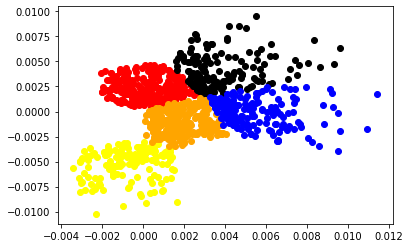

In [31]:
#filter rows of original data
filtered_label2 = PCA_result[label == 2]
 
filtered_label5 = PCA_result[label == 5]

filtered_label7 = PCA_result[label == 7]

filtered_label1 = PCA_result[label == 1]

filtered_label3 = PCA_result[label == 3]
    
#Plotting the results
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'red')
plt.scatter(filtered_label5.iloc[:,0] , filtered_label5.iloc[:,1] , color = 'black')
plt.scatter(filtered_label7.iloc[:,0] , filtered_label7.iloc[:,1] , color = 'yellow')
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'orange')
plt.scatter(filtered_label3.iloc[:,0] , filtered_label3.iloc[:,1] , color = 'blue')



plt.show()

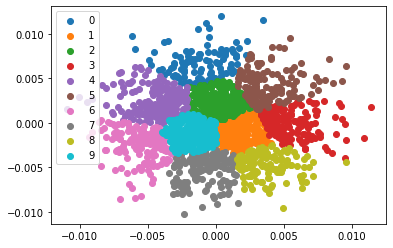

In [33]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(PCA_result.iloc[label == i , 0] , PCA_result.iloc[label == i , 1] , label = i)
plt.legend()
plt.show()

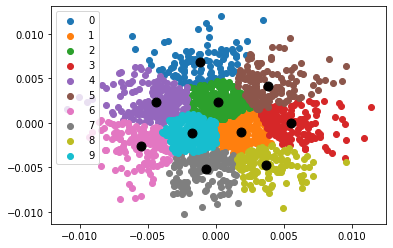

In [35]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(PCA_result.iloc[label == i , 0] , PCA_result.iloc[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [23]:
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
#again, download and load the model
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

model_gigaword = api.load("glove-wiki-gigaword-100")

In [28]:
model_gigaword.most_similar("office",topn=5)

[('offices', 0.7925063371658325),
 ('house', 0.7581615447998047),
 ('department', 0.7455126643180847),
 ('administration', 0.7370805740356445),
 ('post', 0.7357223629951477)]

In [24]:
# tsne plot for below word
# for_word = 'food'
def tsne_plot(for_word, w2v_model):
    # trained word2vec model dimention
    dim_size = w2v_model.vectors.shape[1]

    arrays = np.empty((0, dim_size), dtype='f')
    word_labels = [for_word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, w2v_model.__getitem__([for_word]), axis=0)

    # gets list of most similar words
    sim_words = w2v_model.most_similar(for_word, topn=10)

    # adds the vector for each of the closest words to the array
    for wrd_score in sim_words:
        wrd_vector = w2v_model.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)

    #---------------------- Apply PCA and tsne to reduce dimention --------------

    # fit 2d PCA model to the similar word vectors
    model_pca = PCA(n_components = 10).fit_transform(arrays)

    # Finds 2d coordinates t-SNE
    np.set_printoptions(suppress=True)
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(model_pca)

    # Sets everything up to plot
    df_plot = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words_name': word_labels,
                       'words_color': color_list})

    #------------------------- tsne plot Python -----------------------------------

    # plot dots with color and position
    plot_dot = sns.regplot(data=df_plot,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df_plot['words_color']
                                 }
                    )

    # Adds annotations with color one by one with a loop
    for line in range(0, df_plot.shape[0]):
         plot_dot.text(df_plot["x"][line],
                 df_plot['y'][line],
                 '  ' + df_plot["words_name"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df_plot['words_color'][line],
                 weight='normal'
                ).set_size(15)


    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

    plt.title('t-SNE visualization for word "{}'.format(for_word.title()) +'"')


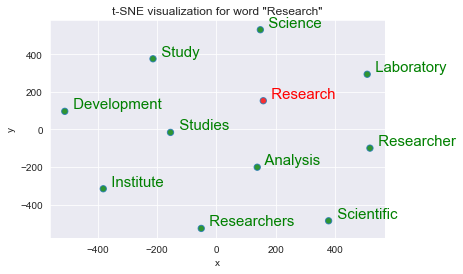

In [25]:
tsne_plot(for_word='research', w2v_model=model_gigaword)

In [10]:
data = pd.read_csv(r"C:\Users\manas\Documents\Master Thesis\code\Manasa2022\skill_id\processed_data\cleaned_data.csv")

In [11]:
data.head(3)

,skill,skill_id
0,emdr,12473585.0
1,io,955308.0
2,product development,972534.0


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn.decomposition import PCA

In [15]:
manasa = data[['skill_id']].tail(10)
manasa.head(3)

,skill_id
5672492,955821.0
5672493,972827.0
5672494,1587839.0


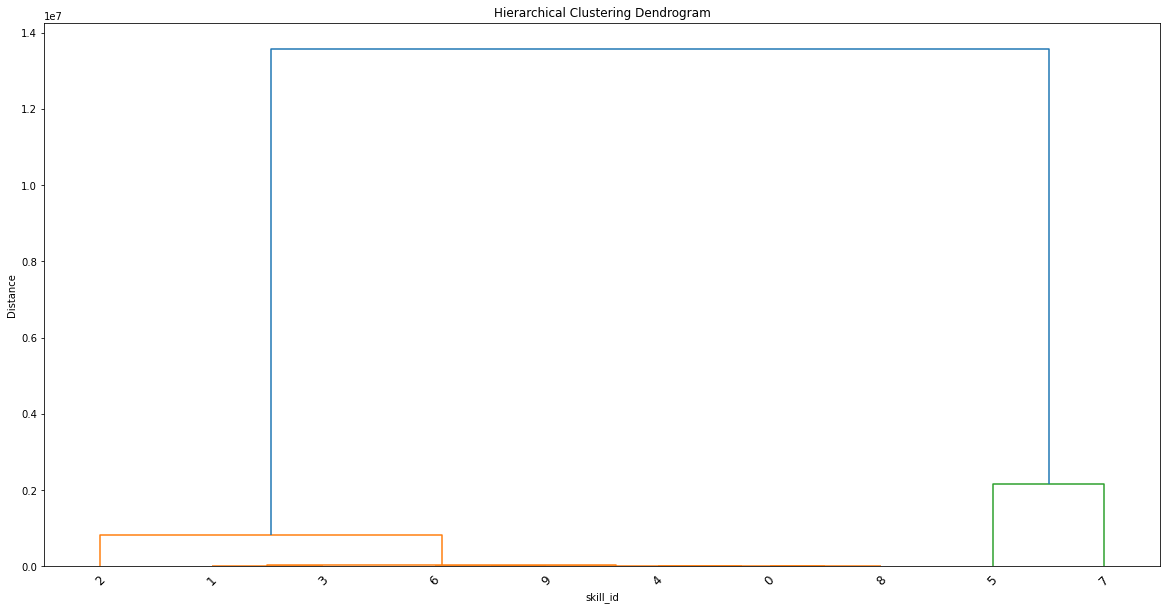

In [17]:
Z=linkage(manasa,'ward')

# Plotting Dendogram
dendrogram(Z, leaf_rotation=45., leaf_font_size=12.)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('skill_id')
plt.ylabel('Distance')
plt.rcParams["figure.figsize"] = (20,10)
plt.show()